# 降维技术
## 1.主成分分析-PCA-SVD
第一种降维的方法称为主成分分析(Principal Component Analysis, PCA)。    
在PCA中，数据从原来的坐标系换到了新的坐标系，新的坐标系的选择是由数据本身决定的。第一个新坐标轴选择的是原始数据中方差最大的方向，第二个新坐标轴的选择与第一个坐标轴正交且具有最大方差的方向。该过程一直重复，重复次数为原始数据中特征的数目。事实上，大部分方差都包含在最前面的几个坐标轴中。因此，可以舍弃余下的坐标轴，即对数据进行了降维处理。

### 1.1 PCA 思想
- PCA的思想是将d维特征映射到k维上$(k<d)$, 这k维是全新的正交特征。这k维特征称为主元，是重新构造出来的k维特征，而不是简单地从d维特征中去除其余$d-k$维特征。  
  
令$y\in R^k$是由特征向量$x\in R^d$经过PCA降维后得到的新的特征向量，这里$(k<d)$。则有：  
$$y=W^Tx\qquad(1)$$
其中，$W$是$d\times k$维且正交的。
> - W由x的统计特征决定
> - 假设均值和协方差阵为：$E[x]=0,E[xx^T]=C_x$ 

### 1.2 最近重构性-PCA 推导
- 先考虑一个问题：对于正交属性空间中的样本点，如何用一个超平面对所有的样本进行恰当的表达？
> 最近重构性： 样本点到这个超平面的距离都足够近。

根据最近重构性，我们得到主成分分析的推导过程。  

由(1)式和PCA思想，我们假设样本进行了中心化处理。  
再假定进行投影变换后得到新的坐标系$(w_1,w_2,\cdots,w_d)$,其中$w_i$是正交基向量，$w_i^Tw_j=0$。若丢弃新坐标系的部分坐标$W=(w_1,w_2,\cdots,w_k)$，即将维度降为$(k<d)$。则样本在新坐标系的投影为y。  

- 若基于y来重构x，则会得到 $x_r=Wy$.
- 考虑原样本点与基于投影重构的样本点$x_r$之间的距离(也叫误差)为： 

$$\epsilon=x-x_r=x-WW^Tx$$  
- 距离平方为：  
\begin{eqnarray}
\lVert\epsilon\rVert^2&=&\epsilon^T\epsilon\notag\\
&=&(x-WW^Tx)^T(x-WW^Tx)\notag\\
&=&x^Tx-2x^TWW^Tx+x^TWW^TWW^TX\notag\\
&=&x^Tx-x^TWW^Tx\notag\\
\end{eqnarray}
> 注意：这里$W^TW=I$.  
- 令$k=1$,即W是一个向量，y是标量。则有期望误差为：
\begin{eqnarray}
E[\epsilon^T\epsilon]&=&E[x^Tx]-E[(x^Tw)(w^Tx)]\notag\\
&=&E[x^Tx]-E[w^Txx^Tw]\notag\\
&=&E[x^Tx]-w^TE[xx^T]w\notag\\
&=&E[x^Tx]-w^TC_xw\notag\\
\end{eqnarray}
- 由最近重构性，最小化$E[\epsilon^T\epsilon]$.等价于 
$$\max_w w^TC_xw$$  
- 标准化w的长度，故定义：  
$$ J=\dfrac{w^TC_xw}{w^Tw}$$
- 目标：找到使得J最大化的w  
对J函数求导数并令其为0，得到：  
$$\dfrac{\partial J}{\partial w}=\dfrac{(w^Tw)2C_xw-(w^TC_xw)2w}{(w^Tw)^2}=0$$
$$0=\dfrac{2C_xw}{w^Tw}-[\dfrac{w^TC_xw}{w^Tw}]\cdot\dfrac{2w}{w^Tw}$$
- 化简可得：  
$$C_xw=Jw \qquad \leftarrow\mathrm{Eigenvalue\quad Problem} $$  


- 由上可知，w是$C_x$的最大特征值J对应的特征向量。


###  总结：  

一般的PCA形式为： $y=W^T(x-m)$.   

其中$m=E[x]$是均值向量，$W$是$d\times k$维矩阵-包含$\mathrm{Var}[x]$的前k个最大特征值对应的特征向量。$W=(w_1,\cdots,w_k)$,这里$w_i$是正交向量.  
- 其中，$w_1$：第一主成分；  
- $w_2$: 第二主成分，等等。
#### 1.1.1 补充：计算复习
随机变量x的期望为：
$$E[x]=\int x\mathrm{p}(x)dx$$  
记$E[x]=m$,则随机变量x的方差为：  

$$\mathrm{Var}[x]=E[(x-m)^2]=E[x^2]-m^2$$  

对于向量$x=(x_1,\cdots,x_d)^T$而言，期望为：  

$$m=E[x]=[E[x_1],E[x_2],\cdots,E[x_d]]^T$$  
协方差矩阵为：  
$$\mathrm{Var}[x]=E[(x-m)(x-m)^T]=E[xx^T]-mm^T$$ 
注意： 协方差矩阵是对称且半正定的。

#### 1.2 PCA 计算过程
假设我们得到的2维数据如下：

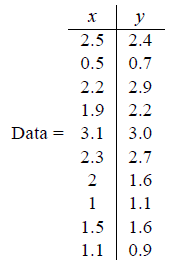

In [2]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/13.png")

行代表样例，列代表特征。

### 1.3 PCA 理论基础
#### 1.3.1 最大方差理论
在信号处理中认为信号具有较大的方差，噪声具有较小的方差，信噪比就说信号与噪声低方差比，越大越好。  
统计学中，方差是指数据分布的大致差幅。一个具有较大方差的特征它的样本散布的数值范围极大，而方差较小则特征的样本分布通常是紧密聚集在一起的。

### 2. 因子分析-Factor Analysis
第二种降维技术是因子分析(Factor Analysis)。在因子分析中，我们假设在观察数据的生成中有一些观察不到的隐变量。假设观察数据是这些隐变量和某些噪声的线性组合。那么隐变量的数据可能比观察数据的数目少，也就是说通过找到隐变量就可以实现数据的降维。

### 3. 独立成分分析-ICA
第三种降维技术就是独立成分分析(Independent Component Analysis, ICA)。ICA假设数据是从N个数据源上生成的，这一点和因子分析相似。假设数据为多个数据源的混合观察结果，这些数据源之间在统计上是相互独立的，而在PCA中只假设数据是不相关的。同因子分析一样，如果数据源的树木少于观察数据的数目，则可以实现降维过程。